# Water Potability Prediction

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("/Users/asmitasharma/Downloads/KDD Project/drinking_water_potability.csv")

In [6]:
df.shape

(3276, 10)

In [7]:
df = df.dropna()

In [8]:
df.shape

(2011, 10)

In [9]:
df = df.sample(frac=1).reset_index(drop=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.209697,169.318505,22610.768710,4.875414,327.379938,549.276728,17.015118,51.505508,3.893767,0
1,5.608623,271.882219,43680.222520,4.157335,366.866533,450.896053,16.442753,61.249762,3.777508,1
2,7.021295,225.350498,23109.854230,5.907273,320.535989,459.899890,13.670099,77.339918,3.675558,0
3,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0
4,6.128426,141.492410,9615.832710,7.627919,277.951704,415.008737,16.435843,50.693927,4.633824,0
...,...,...,...,...,...,...,...,...,...,...
2006,5.841119,194.616894,17721.959560,5.646297,410.358673,622.963575,17.629541,93.070691,4.237560,0
2007,10.272444,163.624623,18894.852390,10.068205,269.646656,446.450725,11.856914,82.445503,3.179885,1
2008,5.685216,154.570002,17628.043060,6.664444,390.094731,324.427772,17.352586,67.407300,4.066157,1
2009,9.085637,238.221968,9001.658753,9.820231,325.104847,381.346582,19.195740,98.490819,2.544020,0


### Logistic regression model

### KNN Model

In [77]:
# Step 1:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	# print("\nr1:", row1)
	# print("\nr2:", row2)
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return np.sqrt(distance)

In [70]:
d = euclidean_distance([2.7810836,2.550537003,0], [3.396561688,4.400293529,0])
d


r1: [2.7810836, 2.550537003, 0]

r1: [2.7810836, 2.550537003, 0]
3.800412482287723


1.9494646655653247

In [ ]:
def p_root(value, root):
     
    root_value = 1 / float(root)
    return round (Decimal(value) **
             Decimal(root_value), 3)
 
def minkowski_distance(x, y, p_value):
     
    # pass the p_root function to calculate
    # all the value of vector parallelly
    return (p_root(sum(pow(abs(a-b), p_value)
            for a, b in zip(x, y)), p_value))

In [79]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		# print("TRAIN: ", train_row)
		# print("\n\nTEST: ", test_row)
		dist = euclidean_distance(train_row, test_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [12]:
# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
	print(neighbor)

[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]


In [80]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	#print(output_values)
	prediction = max(set(output_values), key=output_values.count)
	return prediction

Expected 0, Got 0.


In [44]:
''' independent and dependent features '''
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
P = df.iloc[:]


In [45]:
P

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.209697,169.318505,22610.768710,4.875414,327.379938,549.276728,17.015118,51.505508,3.893767,0
1,5.608623,271.882219,43680.222520,4.157335,366.866533,450.896053,16.442753,61.249762,3.777508,1
2,7.021295,225.350498,23109.854230,5.907273,320.535989,459.899890,13.670099,77.339918,3.675558,0
3,8.551078,216.415932,28909.290280,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0
4,6.128426,141.492410,9615.832710,7.627919,277.951704,415.008737,16.435843,50.693927,4.633824,0
...,...,...,...,...,...,...,...,...,...,...
2006,5.841119,194.616894,17721.959560,5.646297,410.358673,622.963575,17.629541,93.070691,4.237560,0
2007,10.272444,163.624623,18894.852390,10.068205,269.646656,446.450725,11.856914,82.445503,3.179885,1
2008,5.685216,154.570002,17628.043060,6.664444,390.094731,324.427772,17.352586,67.407300,4.066157,1
2009,9.085637,238.221968,9001.658753,9.820231,325.104847,381.346582,19.195740,98.490819,2.544020,0


In [32]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
X_test

array([[ 0.47944551,  0.8667033 ,  0.16253223, ..., -0.28994207,
        -1.46600093, -1.89812298],
       [ 0.70837116,  0.2665382 , -0.52679831, ..., -0.55969842,
         1.07873612,  1.48035344],
       [-0.761469  , -0.74332129,  1.02410825, ...,  0.57965007,
         0.49474203, -1.29235933],
       ...,
       [ 1.04092698,  0.19702023,  0.4285947 , ...,  0.66939552,
         2.35333024, -0.1797342 ],
       [-0.9121712 ,  1.13566674, -0.6359798 , ...,  1.34727186,
         0.64669003,  1.33539458],
       [ 0.33360234,  1.4525545 , -0.4953636 , ..., -1.29022848,
         0.61743737,  0.41882779]])

In [42]:
X_train

array([[-0.02267606, -0.56878024, -1.03179733, ...,  0.59301976,
        -0.79515999,  0.65781525],
       [-0.13800189, -0.16119606,  0.01109532, ..., -1.44394331,
         0.11260187,  0.7331956 ],
       [-0.101575  ,  0.67208848, -0.33689542, ..., -0.42857267,
         0.6368513 , -2.50849884],
       ...,
       [-0.67229314,  0.95877553, -1.04833755, ..., -2.17117004,
        -1.58343063, -0.48326344],
       [ 0.03622394,  1.32284848, -0.84568572, ...,  0.17698469,
        -0.83857701, -1.71149284],
       [-0.61601124,  1.40471387, -1.54067141, ...,  0.73077722,
        -1.18022489,  1.25465334]])

In [33]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (1608, 9)
X_test shape:  (403, 9)


In [34]:
''' standard scaler '''
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
models_acc = []

models = [LogisticRegression(), KNeighborsClassifier(metric='euclidean'), GaussianNB()]

for model in models:
    ''' fit on data '''
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    ''' appending result to model_acc'''
    models_acc.append(accuracy_score(y_test, pred))

In [98]:
''' creating dataframe '''
res = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['LogisticRegression', 'KNeighborsClassifier', 'GaussianNB']
})

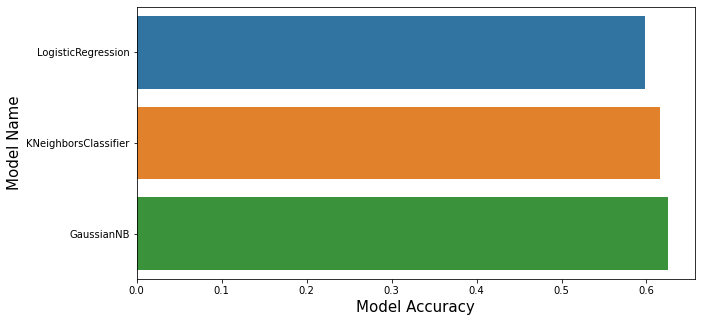

In [99]:
''' barplot plot models accuracy '''
plt.figure(figsize=(10, 5))
sns.barplot(res['Model Accuracy'], res['Model Name'])
plt.xlabel('Model Accuracy', fontsize=15)
plt.ylabel('Model Name', fontsize=15);

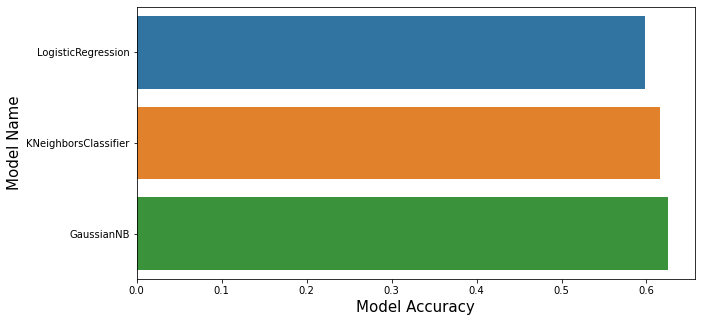

In [100]:
''' barplot plot models accuracy '''
plt.figure(figsize=(10, 5))
sns.barplot(res['Model Accuracy'], res['Model Name'])
plt.xlabel('Model Accuracy', fontsize=15)
plt.ylabel('Model Name', fontsize=15);

In [101]:
res

,Model Accuracy,Model Name
0,0.598015,LogisticRegression
1,0.615385,KNeighborsClassifier
2,0.625310,GaussianNB


In [103]:
res

,Model Accuracy,Model Name
0,0.598015,LogisticRegression
1,0.615385,KNeighborsClassifier
2,0.625310,GaussianNB


In [48]:
data = df.to_numpy()
data

array([[6.20969744e+00, 1.69318505e+02, 2.26107687e+04, ...,
        5.15055083e+01, 3.89376683e+00, 0.00000000e+00],
       [5.60862315e+00, 2.71882219e+02, 4.36802225e+04, ...,
        6.12497619e+01, 3.77750827e+00, 1.00000000e+00],
       [7.02129531e+00, 2.25350498e+02, 2.31098542e+04, ...,
        7.73399182e+01, 3.67555796e+00, 0.00000000e+00],
       ...,
       [5.68521646e+00, 1.54570002e+02, 1.76280431e+04, ...,
        6.74073001e+01, 4.06615700e+00, 1.00000000e+00],
       [9.08563710e+00, 2.38221968e+02, 9.00165875e+03, ...,
        9.84908193e+01, 2.54402028e+00, 0.00000000e+00],
       [5.55535297e+00, 1.54300684e+02, 2.05034300e+04, ...,
        7.51403617e+01, 4.53614591e+00, 0.00000000e+00]])

In [66]:
print(X_test)

[[ 0.47944551  0.8667033   0.16253223 ... -0.28994207 -1.46600093
  -1.89812298]
 [ 0.70837116  0.2665382  -0.52679831 ... -0.55969842  1.07873612
   1.48035344]
 [-0.761469   -0.74332129  1.02410825 ...  0.57965007  0.49474203
  -1.29235933]
 ...
 [ 1.04092698  0.19702023  0.4285947  ...  0.66939552  2.35333024
  -0.1797342 ]
 [-0.9121712   1.13566674 -0.6359798  ...  1.34727186  0.64669003
   1.33539458]
 [ 0.33360234  1.4525545  -0.4953636  ... -1.29022848  0.61743737
   0.41882779]]


In [ ]:
# # Step 1:
# # calculate the Euclidean distance between two vectors
# def euclidean_distance(row1, row2):
# 	distance = 0.0
# 	print("\nr1:", row1)
# 	print("\nr1:", row1)
# 	for i in range(len(row1)-1):
# 		distance += (row1[i] - row2[i])**2

# 	return np.sqrt(distance)

In [74]:

train = [6.20969744e+00, 1.69318505e+02, 2.26107687e+04, 4.87541388e+00, 3.27379938e+02, 5.49276728e+02, 1.70151180e+01, 5.15055083e+01, 3.89376683e+00]

test = [ 0.47944551, 0.8667033,   0.16253223, -0.77312264, -0.80833674, -0.47067121, -0.28994207, -1.46600093, -1.89812298]

d = euclidean_distance(train, test)

d



r1: [6.20969744, 169.318505, 22610.7687, 4.87541388, 327.379938, 549.276728, 17.015118, 51.5055083, 3.89376683]

r2: [0.47944551, 0.8667033, 0.16253223, -0.77312264, -0.80833674, -0.47067121, -0.28994207, -1.46600093, -1.89812298]
511680987.21775585


22620.366646404207

In [94]:

# count = 2
# for i in X_test:
#     #print(i)
#     prediction = predict_classification(data, i, 3)
#     pred.append(prediction)
#     count+=1
    

for c in range(1, 11):
    pred = []
    for i in X_test:
        prediction = predict_classification(data, i, c)
        pred.append(prediction)
    
    a = accuracy_score(y_test, pred)
    print("Accuracy " + str(c), a)
    


# train = [6.20969744e+00 1.69318505e+02 2.26107687e+04 4.87541388e+00
#  3.27379938e+02 5.49276728e+02 1.70151180e+01 5.15055083e+01
#  3.89376683e+00 0.00000000e+00]

# test = [ 0.47944551  0.8667033   0.16253223 -0.77312264 -0.80833674 -0.47067121
#  -0.28994207 -1.46600093 -1.89812298]


Accuracy 1 0.5905707196029777
Accuracy 2 0.5905707196029777
Accuracy 3 0.4094292803970223
Accuracy 4 0.4094292803970223
Accuracy 5 0.4094292803970223
Accuracy 6 0.5905707196029777
Accuracy 7 0.4094292803970223
Accuracy 8 0.5905707196029777
Accuracy 9 0.4094292803970223
Accuracy 10 0.5905707196029777
